# How do people who save a home vote on the NPS prompt?
Time frame: Last month

In [1240]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline  

In [1241]:
pd.options.display.max_colwidth = 100

In [1242]:
#SQL query used to generate data on saved homes and NPS score

#select distinct nps.customer_id, nps.comments, nps.score, c.client_id 
#from net_promoter_score nps, my_homes mh, client c
#where mh.user_id = c.client_id
#and c.customer_id = nps.customer_id
#and nps.create_date > sysdate -30;



In [1243]:
df = pd.read_csv("/users/asalazar/saved_homes_nps.csv", index_col =3)

In [1244]:
#Let's read our data and make sure it's looks a-okay
df.head()

,CUSTOMER_ID,COMMENTS,SCORE
CLIENT_ID,,,
7768107,6231753,NaN,8
7727525,4623098,NaN,10
16917760,13369436,NaN,9
17089945,11718856,NaN,5
19622325,15518517,More info on homes( like Zillow) and better mapping.Thanks,7


In [1245]:
#What sort of info is in our data?
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1368 entries, 7768107 to 14324932
Data columns (total 3 columns):
CUSTOMER_ID    1368 non-null int64
COMMENTS       183 non-null object
SCORE          1344 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 42.8+ KB


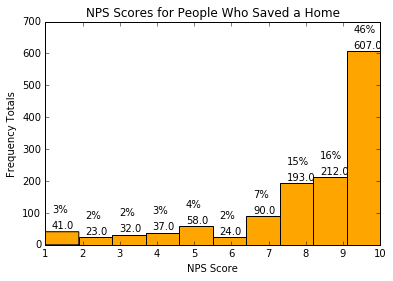

In [1246]:
#Plotting my first histogram to see frequency of responses by NPS score
    
x1=df['SCORE']  #NPS responses
fig, ax = plt.subplots() #do this to use ax later

#Labels
plt.xlabel('NPS Score')
plt.ylabel ('Frequency Totals')

#Axis
plt.axis([1, 10, 0, 700])
plt.title('NPS Scores for People Who Saved a Home')

#Basic plot stuff
counts, bins, patches = plt.hist(x1.dropna(), bins = 10, range = [1,10], color = 'Orange') 
#Don't forget to drop NaN values!

#Value labels
bin_centers = 0.2 * np.diff(bins) + bins[:-1] #Centers labels
for count, x in zip(counts, bin_centers):
    bin_heights= count + 10 #Makes bin labels a bit higher than the bin itsels
    # Label the raw counts
    ax.annotate(str(count), xy=(x,count), xytext=(x,bin_heights))
    
     # Label percentages
    percent = '%0.0f%%' % (100 * float(count) / counts.sum())
    ax.annotate(percent, xy=(x, count), xytext=(x, bin_heights + 50))
    
    

# How do people who schedule a visit vote on the NPS prompt?

In [1247]:
df = pd.read_csv("/users/asalazar/scheduled_visit_nps.csv", index_col =3)

In [1248]:
df.head()

,CUSTOMER_ID,COMMENTS,SCORE
CLIENT_ID,,,
17722253,14042631,NaN,10
14042974,10767642,NaN,8
17726453,11887119,its great here,10
17954375,14211039,NaN,10
16694263,13168468,NaN,2


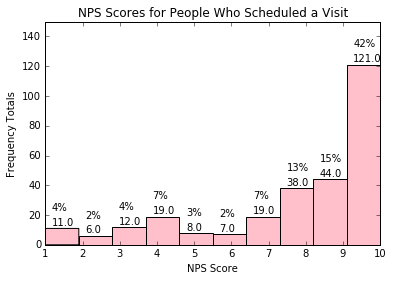

In [1249]:
x2=df['SCORE']  #NPS responses
fig, ax = plt.subplots()#do this to use ax later

#Labels
plt.xlabel('NPS Score')
plt.ylabel ('Frequency Totals')

#Axis
plt.axis([1, 10, 0, 150])
plt.title('NPS Scores for People Who Scheduled a Visit')

#Basic plot stuff
counts, bins, patches = plt.hist(x2.dropna(), bins = 10, range = [1,10], color = 'Pink') 
#Don't forget to drop NaN values!

#Value labels
bin_centers = 0.2 * np.diff(bins) + bins[:-1] #Centers labels
for count, x in zip(counts, bin_centers):
    bin_heights= count + 2 #Makes bin labels a bit higher than the bin itsels
    # Label the raw counts
    ax.annotate(str(count), xy=(x,count), xytext=(x,bin_heights))
    
    # Label percentages
    percent = '%0.0f%%' % (100 * float(count) / counts.sum())
    ax.annotate(percent, xy=(x, count), xytext=(x, bin_heights + 10))
    

# Let's take it back to some words


In [1250]:
df = df.reset_index() #Get client_id out of hurr

In [1251]:
df.loc[df.SCORE > 8, ['COMMENTS', 'SCORE']] #Comments from promoters. There are a lot of nulls here.

,COMMENTS,SCORE
0,NaN,10
2,its great here,10
3,NaN,10
7,Like it as is,10
8,NaN,10
9,NaN,9
11,NaN,10
12,NaN,10
13,NaN,10
14,NaN,10


In [1252]:
df = df[pd.notnull(df['COMMENTS'])]#remove nulls!

In [1253]:
df.head()

,CLIENT_ID,CUSTOMER_ID,COMMENTS,SCORE
2,17726453,11887119,its great here,10
7,9461558,7245520,Like it as is,10
24,15253547,7773005,its super dope already.,4
25,16081866,7773005,its super dope already.,4
26,16081863,7773005,its super dope already.,4


In [1254]:
df.columns 

Index([u'CLIENT_ID', u'CUSTOMER_ID', u'COMMENTS', u'SCORE'], dtype='object')

In [1255]:
df = df[['CUSTOMER_ID','COMMENTS','SCORE']]

In [1256]:
df= df.drop_duplicates('CUSTOMER_ID') #Remove dups 

In [1257]:
df.head()

,CUSTOMER_ID,COMMENTS,SCORE
2,11887119,its great here,10
7,7245520,Like it as is,10
24,7773005,its super dope already.,4
35,9841224,It's great!,10
36,3306302,I recommend you all the time!,10


In [1258]:
df = df.sort('SCORE', ascending = False)

/Users/asalazar/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [1259]:
df

,CUSTOMER_ID,COMMENTS,SCORE
2,11887119,its great here,10
162,8757290,Have the taxes in the listings,10
155,10718546,I have always been happy with Zips options,10
133,15586137,The website is easy to navigate through with filters that make it easier.,10
7,7245520,Like it as is,10
123,14791239,Find homes in Harford county with out searching the school system and possibly a drawing tool. S...,10
78,4154735,fix the map...,10
75,12909594,.,10
72,15582261,Allow the editing of saved searches,10
208,7470284,"Let us know how much the property was sold for, it will give us a better sense of what we are lo...",10


# Oh my word

In [1260]:
#Most common words in the NPS survey

from string import punctuation
from operator import itemgetter

N = 40
words = {}

words_gen = (word.strip(punctuation).lower() for line in df['COMMENTS']
                                             for word in line.split())


for word in words_gen:
    words[word] = words.get(word, 0) + 1

    
   
top_words = sorted(words.iteritems(), key=itemgetter(1), reverse=True)[:N]

for word, frequency in top_words:
     if len(word) >4:
        print "%s: %d" % (word, frequency)
     
    

would: 4
already: 2
great: 2
listings: 2
website: 2
allow: 2
don't: 1
